# 算法名称： KMeans 

   - __KMeans__ 
```   
    sklearn.cluster.KMeans(n_clusters=8, 
                           init=’k-means++’, 
                           n_init=10, 
                           max_iter=300, 
                           tol=0.0001, 
                           precompute_distances=’auto’, 
                           verbose=0, 
                           random_state=None, 
                           copy_x=True, 
                           n_jobs=None, 
                           algorithm=’auto’)
```

**1. 类别**
    
    Cluster, 非监督学习

**2. 数学原理及证明**

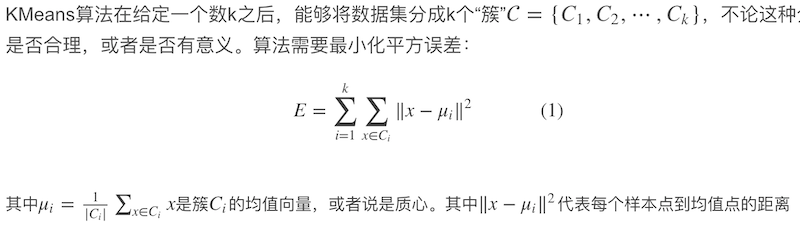
    
  - __KMeans的基本算法流程__
  
    输入：样本数据集D，聚类簇数k 
        1. 从样本中随机选取k个样本点作为初始的均值向量{μ1,μ2,⋯,μk}
        2. 循环以下几步直到达到停止条件：
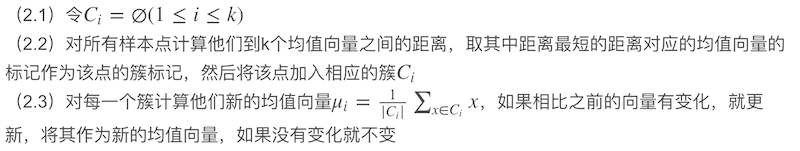

**3. 算法关键参数及特点**
   
   KMeans的基本算法是很容易理解的，算法本身也挺简单，运行较快，所以KMeans可用于非常大型的数据集。尤其当数据集是密集的、球状或团状的簇群，且簇与簇之间区别明显时，聚类效果很好。但是KMeans也有一些缺点：
   
   1. 对**初始值敏感**。KMeans可能由于初始值选的不同，导致最终结果的不同。我的理解是我们要优化的其实是式（1），但是它很难优化，所以我们采用的是一种贪心算法，那么这种算法就可能掉进局部最优的坑里面，所以我们要尽量多选几个初始值多计算几次。不过scikit-learn里面KMeans的算法的参数里面有个’init’参数，将其设置成’init = k-means++’可以在初始化均值向量的时候让他们之间尽量分开。
    
   2. 对**特殊分布的数据集不能够得出合理的结果**。如下图，期望得到左边的结果，但是出来的是右边的结果： 
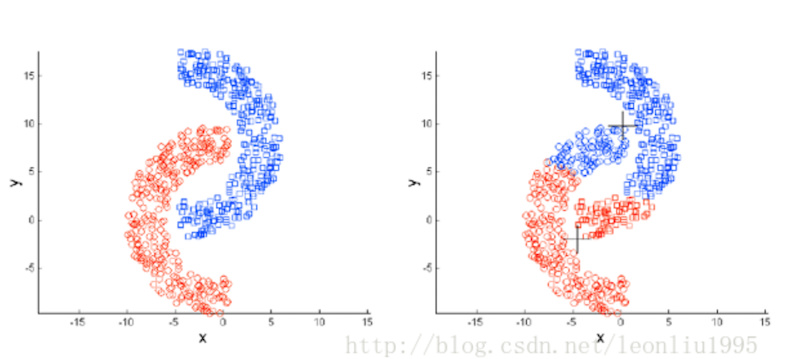
   

**4. Refer to**
  - https://scikit-learn.org/stable/modules/generated/sklearn.cluster.KMeans.html
  - https://blog.csdn.net/leonliu1995/article/details/78944798
  - https://blog.csdn.net/qq_39388410/article/details/78235882
 

Python version: 3.7.3 (default, Mar 27 2019, 16:54:48) 
[Clang 4.0.1 (tags/RELEASE_401/final)]
pandas version: 0.24.2
matplotlib version: 3.0.3
numpy version: 1.16.2
scipy version: 1.2.1
IPython version: 7.4.0
sklearn version: 0.20.3

 Input data and three steps of the k-means algorithm


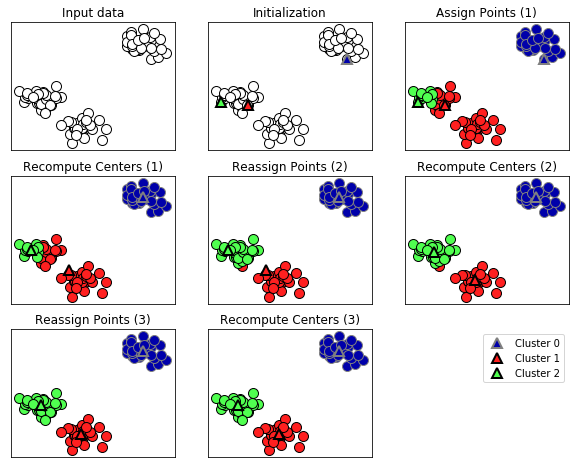

In [5]:
import sys
print("Python version: {}".format(sys.version))

import pandas as pd
print("pandas version: {}".format(pd.__version__))

import matplotlib
print("matplotlib version: {}".format(matplotlib.__version__))

import numpy as np
print("numpy version: {}".format(np.__version__))

import scipy as sp 
print("scipy version: {}".format(sp.__version__))

import IPython 
print("IPython version: {}".format(IPython.__version__))

import sklearn
print("sklearn version: {}".format(sklearn.__version__))

import warnings
warnings.filterwarnings('ignore')

import mglearn
import matplotlib.pyplot as plt



print("\n Input data and three steps of the k-means algorithm")

mglearn.plots.plot_kmeans_algorithm()
plt.show()

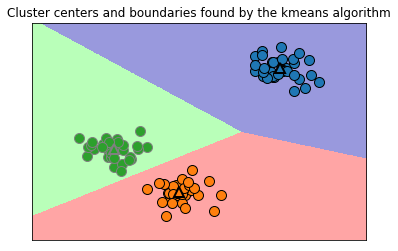

In [6]:
mglearn.plots.plot_kmeans_boundaries()
plt.title("Cluster centers and boundaries found by the kmeans algorithm")
plt.show()

In [7]:
from sklearn.datasets import make_blobs
from sklearn.cluster import KMeans

# generate synhetic two-dimensional data
X, y = make_blobs(random_state=1)

# build the cluster model
kmeans = KMeans(n_clusters = 3)
kmeans.fit(X)

print("Cluster memeberships:\n{}".format(kmeans.labels_))
print("\nRunning predict on the traning set returns the same result as labels_")
print(kmeans.predict(X))

Cluster memeberships:
[0 2 2 2 1 1 1 2 0 0 2 2 1 0 1 1 1 0 2 2 1 2 1 0 2 1 1 0 0 1 0 0 1 0 2 1 2
 2 2 1 1 2 0 2 2 1 0 0 0 0 2 1 1 1 0 1 2 2 0 0 2 1 1 2 2 1 0 1 0 2 2 2 1 0
 0 2 1 1 0 2 0 2 2 1 0 0 0 0 2 0 1 0 0 2 2 1 1 0 1 0]

Running predict on the traning set returns the same result as labels_
[0 2 2 2 1 1 1 2 0 0 2 2 1 0 1 1 1 0 2 2 1 2 1 0 2 1 1 0 0 1 0 0 1 0 2 1 2
 2 2 1 1 2 0 2 2 1 0 0 0 0 2 1 1 1 0 1 2 2 0 0 2 1 1 2 2 1 0 1 0 2 2 2 1 0
 0 2 1 1 0 2 0 2 2 1 0 0 0 0 2 0 1 0 0 2 2 1 1 0 1 0]


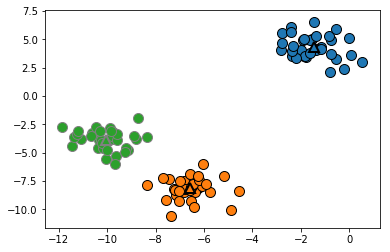

In [8]:
mglearn.discrete_scatter(X[:,0], X[:,1], kmeans.labels_, markers='o')
mglearn.discrete_scatter(kmeans.cluster_centers_[:, 0],
                         kmeans.cluster_centers_[:, 1], [0, 1, 2], markers='^', markeredgewidth=2)
plt.show()

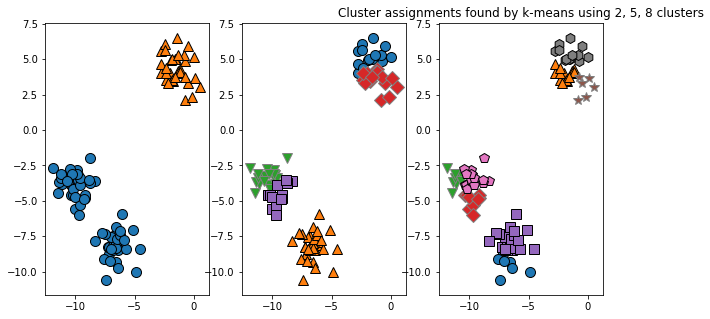

In [9]:
fig, axes = plt.subplots(1, 3, figsize=(10, 5))

# using tow cluster centers:
kmeans = KMeans(n_clusters=2)
kmeans.fit(X)

assigments = kmeans.labels_ 

mglearn.discrete_scatter(X[:,0], X[:, 1], assigments, ax=axes[0])

# using tow cluster centers:
kmeans = KMeans(n_clusters=5)
kmeans.fit(X)

assigments = kmeans.labels_ 

mglearn.discrete_scatter(X[:,0], X[:, 1], assigments, ax=axes[1])

# using tow cluster centers:
kmeans = KMeans(n_clusters=8)
kmeans.fit(X)

assigments = kmeans.labels_ 

mglearn.discrete_scatter(X[:,0], X[:, 1], assigments, ax=axes[2])
plt.title("Cluster assignments found by k-means using 2, 5, 8 clusters")
plt.show()


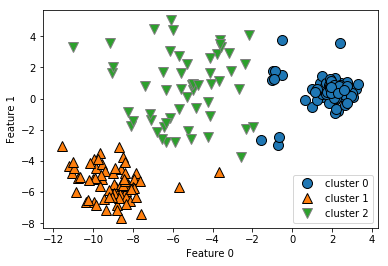

In [10]:
X_varied, y_varied = make_blobs(n_samples=200, cluster_std=[1.0, 2.5, 0.5], random_state=170)

y_pred = KMeans(n_clusters=3, random_state=0).fit_predict(X_varied)

mglearn.discrete_scatter(X_varied[:, 0], X_varied[:, 1], y_pred)
plt.legend(["cluster 0", "cluster 1", "cluster 2"], loc='best')
plt.xlabel("Feature 0")
plt.ylabel("Feature 1")
plt.show()

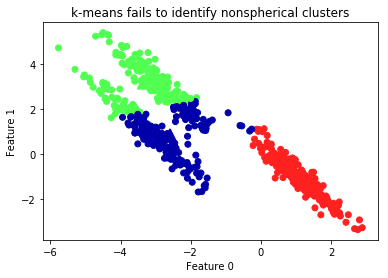

The chart shows that k-means only considers the distance to the nearest cluster center. It can not handle this kind of data


In [11]:
X, y = make_blobs(n_samples=600, random_state=170)
rng = np.random.RandomState(74)

# transform the data to be stretched
transformation = rng.normal(size=(2,2))

X = np.dot(X, transformation)

# cluster the data into three clusters
kmeans = KMeans(n_clusters=3)
kmeans.fit(X)

y_pred = kmeans.predict(X)

# plot the cluster assignments and cluster centers
plt.scatter(X[:,0], X[:, 1], c=y_pred, cmap=mglearn.cm3)
plt.scatter(kmeans.cluster_centers_[:,0], kmeans.cluster_centers_[:,1], 
            marker='^', c=[0,1,2], s=100, linewidth=2, cmap=mglearn.cm3)
plt.xlabel("Feature 0")
plt.ylabel("Feature 1")
plt.title("k-means fails to identify nonspherical clusters")
plt.show()
print("The chart shows that k-means only considers the distance to the nearest cluster center. It can not handle this kind of data")

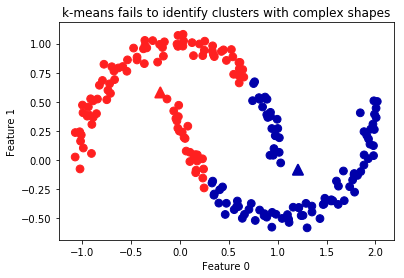

In [12]:
# generate two moons data
from sklearn.datasets import make_moons
X, y = make_moons(n_samples=200, noise=0.05, random_state=0)

# cluster the data into three clusters
kmeans = KMeans(n_clusters=2)
kmeans.fit(X)

y_pred = kmeans.predict(X)

# plot the cluster assignments and cluster centers
plt.scatter(X[:,0], X[:, 1], c=y_pred, cmap=mglearn.cm2, s=60)
plt.scatter(kmeans.cluster_centers_[:,0], kmeans.cluster_centers_[:,1], 
            marker='^', c=[mglearn.cm2(0), mglearn.cm2(1)], s=100, linewidth=2)
plt.xlabel("Feature 0")
plt.ylabel("Feature 1")
plt.title("k-means fails to identify clusters with complex shapes")
plt.show()

## Compare nmf/pca/kmeans on face dataset
---

people.images.shape: (3023, 87, 65)
Number of classes(person): 62


Alejandro Toledo           39 Alvaro Uribe               35 Amelie Mauresmo            21 
Andre Agassi               36 Angelina Jolie             20 Ariel Sharon               77 
Arnold Schwarzenegger      42 Atal Bihari Vajpayee       24 Bill Clinton               29 
Carlos Menem               21 Colin Powell              236 David Beckham              31 
Donald Rumsfeld           121 George Robertson           22 George W Bush             530 
Gerhard Schroeder         109 Gloria Macapagal Arroyo    44 Gray Davis                 26 
Guillermo Coria            30 Hamid Karzai               22 Hans Blix                  39 
Hugo Chavez                71 Igor Ivanov                20 Jack Straw                 28 
Jacques Chirac             52 Jean Chretien              55 Jennifer Aniston           21 
Jennifer Capriati          42 Jennifer Lopez             21 Jeremy Greenstock          24 
Jiang Zemin           

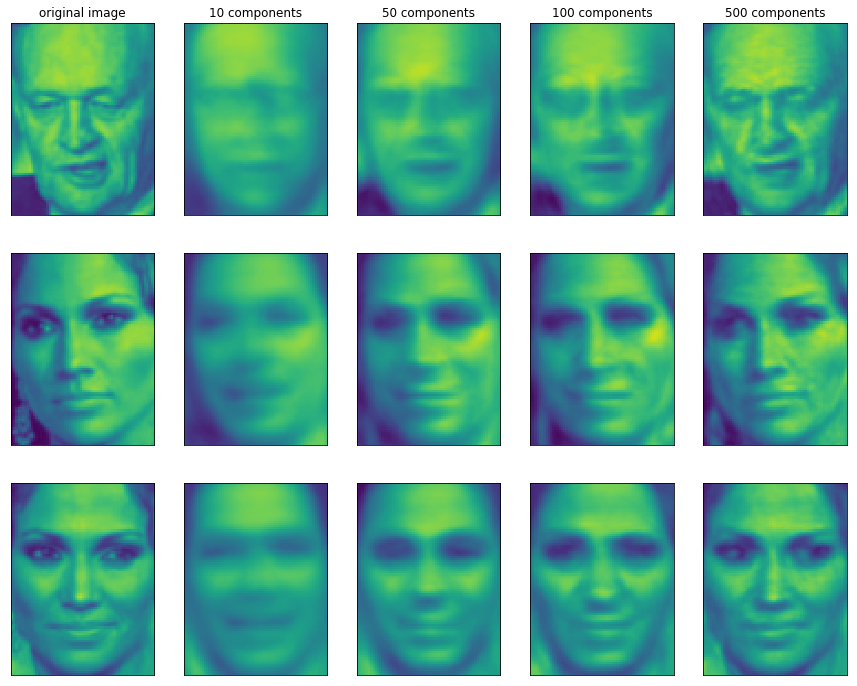

In [13]:
from sklearn.datasets import fetch_lfw_people
people = fetch_lfw_people(min_faces_per_person=20, resize=0.7)
image_shape = people.images[0].shape

# a image size: 87*65. 3023 images in total. 
print("people.images.shape: {}".format(people.images.shape))

# How many people in this data set. It's 62. 
print("Number of classes(person): {}".format(len(people.target_names)))
print("\n")

# count how often each target appears
counts = np.bincount(people.target)

# print counts next to targt names
for i, (count, name) in enumerate(zip(counts, people.target_names)):
    print("{0:25} {1:3}".format(name, count), end=' ')
    if (i + 1) % 3 == 0:
        print()
        
mask = np.zeros(people.target.shape, dtype=np.bool)
for target in np.unique(people.target):
    mask[np.where(people.target == target)[0][:50]] = 1
    
X_people = people.data[mask]
y_people = people.target[mask]

# scale the grayscale values to be between 0 and 1
# instead of 0 and 255 for better numeric stability 

X_people = X_people / 255

# split the data into traning and test sets
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X_people, y_people, stratify=y_people, random_state=0)

mglearn.plots.plot_nmf_faces(X_train, X_test, image_shape)
plt.show()

# run with nmf 
from sklearn.decomposition import NMF
nmf = NMF(n_components=15, random_state=0)
nmf.fit(X_train)

# run with pca
from sklearn.decomposition import PCA
pca = PCA(n_components=100, random_state=0)
pca.fit(X_train)


# run with kmeans
from sklearn.cluster import KMeans
kmeans = KMeans(n_clusters=100, random_state=0)
kmeans.fit(X_train)

X_reconstructed_pca = pca.inverse_transform(pca.transform(X_test))
X_reconstructed_kmeans = kmeans.cluster_centers_[kmeans.predict(X_test)]
X_reconstructed_nmf = np.dot(nmf.transform(X_test), nmf.components_)

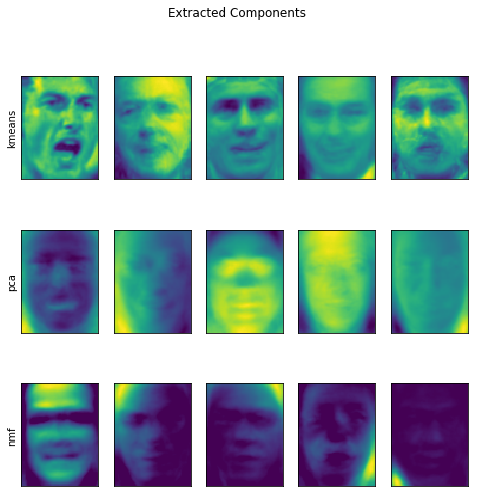

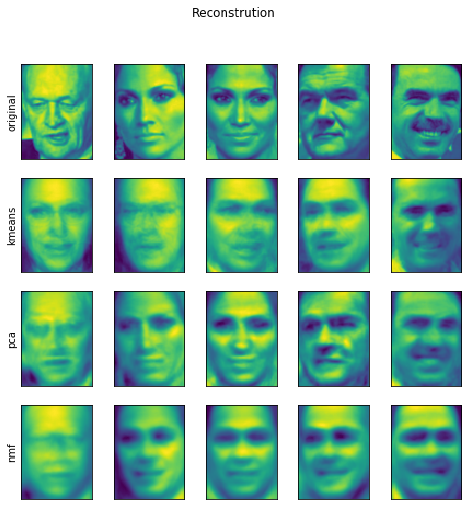

In [14]:
fig, axes = plt.subplots(3, 5, figsize=(8,8),
                        subplot_kw={'xticks': (), 'yticks': ()})
fig.suptitle("Extracted Components")

for ax, comp_kmeans, comp_pca, comp_nmf in zip(axes.T, kmeans.cluster_centers_, pca.components_, nmf.components_):
    ax[0].imshow(comp_kmeans.reshape(image_shape))
    ax[1].imshow(comp_pca.reshape(image_shape))
    ax[2].imshow(comp_nmf.reshape(image_shape))
    
axes[0,0].set_ylabel("kmeans")
axes[1,0].set_ylabel("pca")
axes[2,0].set_ylabel("nmf")
plt.show()

####
fig, axes = plt.subplots(4, 5, figsize=(8,8),
                        subplot_kw={'xticks': (), 'yticks': ()})
fig.suptitle("Reconstrution")

for ax, orig, rec_kmeans, rec_pca, rec_nmf in zip(axes.T, X_test, X_reconstructed_kmeans, X_reconstructed_pca, X_reconstructed_nmf):
    ax[0].imshow(orig.reshape(image_shape))
    ax[1].imshow(rec_kmeans.reshape(image_shape))
    ax[2].imshow(rec_pca.reshape(image_shape))
    ax[3].imshow(rec_nmf.reshape(image_shape))
    
axes[0,0].set_ylabel("original")
axes[1,0].set_ylabel("kmeans")
axes[2,0].set_ylabel("pca")
axes[3,0].set_ylabel("nmf")
plt.show()

Cluster memberships:
[9 2 5 4 2 7 9 6 9 6 1 0 2 6 1 9 3 0 3 1 7 6 8 6 8 5 2 7 5 8 9 8 6 5 3 7 0
 9 4 5 0 1 3 5 2 8 9 1 5 6 1 0 7 4 6 3 3 6 3 8 0 4 2 9 6 4 8 2 8 4 0 4 0 5
 6 4 5 9 3 0 7 8 0 7 5 8 9 8 0 7 3 9 7 1 7 2 2 0 4 5 6 7 8 9 4 5 4 1 2 3 1
 8 8 4 9 2 3 7 0 9 9 1 5 8 5 1 9 5 6 7 9 1 4 0 6 2 6 4 7 9 5 5 3 8 1 9 5 6
 3 5 0 2 9 3 0 8 6 0 3 3 5 6 3 2 0 2 3 0 2 6 3 4 4 1 5 6 7 1 1 3 2 4 7 2 7
 3 8 6 4 1 4 3 9 9 5 1 7 5 8 2]


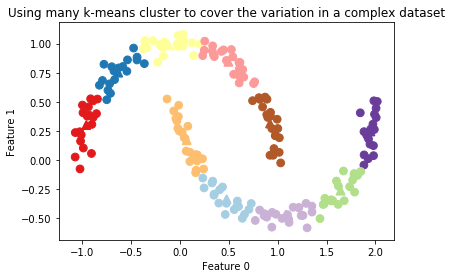

In [15]:
# generate two moons data
from sklearn.datasets import make_moons
X, y = make_moons(n_samples=200, noise=0.05, random_state=0)

# cluster the data into three clusters
kmeans = KMeans(n_clusters=10, random_state=0)
kmeans.fit(X)

y_pred = kmeans.predict(X)

# plot the cluster assignments and cluster centers
plt.scatter(X[:,0], X[:, 1], c=y_pred, cmap='Paired', s=60)
plt.scatter(kmeans.cluster_centers_[:,0], kmeans.cluster_centers_[:,1], 
            marker='^', c=range(kmeans.n_clusters), s=60, linewidth=2, cmap='Paired')
plt.xlabel("Feature 0")
plt.ylabel("Feature 1")
plt.title("Using many k-means cluster to cover the variation in a complex dataset")
print("Cluster memberships:\n{}".format(y_pred))
plt.show()

In [16]:
distance_features = kmeans.transform(X)
print("Distance feature shape: {}".format(distance_features.shape))
print("Distance feature:\n {}".format(distance_features))



Distance feature shape: (200, 10)
Distance feature:
 [[0.9220768  1.46553151 1.13956805 ... 1.16559918 1.03852189 0.23340263]
 [1.14159679 2.51721597 0.1199124  ... 0.70700803 2.20414144 0.98271691]
 [0.78786246 0.77354687 1.74914157 ... 1.97061341 0.71561277 0.94399739]
 ...
 [0.44639122 1.10631579 1.48991975 ... 1.79125448 1.03195812 0.81205971]
 [1.38951924 0.79790385 1.98056306 ... 1.97788956 0.23892095 1.05774337]
 [1.14920754 2.4536383  0.04506731 ... 0.57163262 2.11331394 0.88166689]]


## Python Implementation of Kmeans
---

In [17]:
def distEclud(vecA, vecB):#计算两个向量的欧式距离 
    return sqrt(sum(power(vecA - vecB, 2))) 

def randCent(dataSet, k):#随机质心 
    n = shape(dataSet)[1] 
    centroids = mat(zeros((k,n))) 
    for j in range(n): 
        minJ = min(dataSet[:,j]) 
        rangeJ = float(max(dataSet[:,j]) - minJ) 
        centroids[:,j] = mat(minJ + rangeJ * random.rand(k,1)) 
    return centroids 

def kMeans(dataSet, k, distMeas=distEclud, createCent=randCent): 
    m = shape(dataSet)[0] 
    clusterAssment = mat(zeros((m,2)))#存储每个点的分配，即簇索引值和误差 
    centroids = createCent(dataSet, k) 
    clusterChanged = True 
    while clusterChanged: 
        clusterChanged = False 
        for i in range(m): 
            minDist = inf; 
            minIndex = -1 
            for j in range(k):#寻找最近质心 
                distJI = distMeas(centroids[j,:],dataSet[i,:]) 
                if distJI < minDist: 
                    minDist = distJI; 
                    minIndex = j 
            if clusterAssment[i,0] != minIndex: clusterChanged = True 
            clusterAssment[i,:] = minIndex,minDist**2 
        print (centroids) 
        for cent in range(k):#更新质心的位置 
            ptsInClust = dataSet[nonzero(clusterAssment[:,0].A==cent)[0]] 
            centroids[cent,:] = mean(ptsInClust, axis=0) 
    return centroids, clusterAssment

## Comparing MiniBatchKMeans and KMeans
---
K-Means算法是常用的聚类算法，但其算法本身存在一定的问题，例如在大数据量下的计算时间过长就是一个重要问题。为此，Mini Batch K-Means，这个基于K-Means的变种聚类算法应运而生。

Mini Batch KMeans使用了一个种叫做Mini Batch（分批处理）的方法对数据点之间的距离进行计算。Mini Batch的好处是计算过程中不必使用所有的数据样本，而是从不同类别的样本中抽取一部分样本来代表各自类型进行计算。由于计算样本量少，所以会相应的减少运行时间，但另一方面抽样也必然会带来准确度的下降。

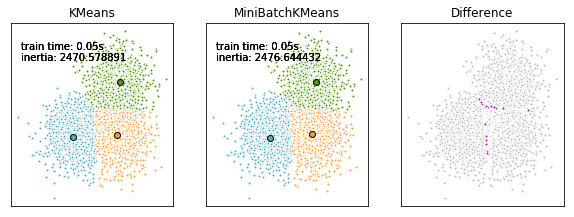

In [18]:
import time 
import numpy as np 
import matplotlib.pyplot as plt 
from sklearn.cluster import MiniBatchKMeans, KMeans 
from sklearn.metrics.pairwise import pairwise_distances_argmin 
from sklearn.datasets.samples_generator import make_blobs 

#s生成数据 
np.random.seed(0) 
batch_size = 45 
centers = [[1, 1], [-1, -1], [1, -1]] 
n_clusters = len(centers) 
X, labels_true = make_blobs(n_samples=3000, centers=centers, cluster_std=0.7) 

#Means 
k_means = KMeans(init='k-means++',
                 n_clusters=3, 
                 n_init=10) 
t0 = time.time() 
k_means.fit(X) 
t_batch = time.time() - t0 

#MiniBatchKMeans 
mbk = MiniBatchKMeans(init='k-means++', 
                      n_clusters=3, 
                      batch_size=batch_size, 
                      n_init=10, 
                      max_no_improvement=10, 
                      verbose=0) 
t0 = time.time() 
mbk.fit(X) 
t_mini_batch = time.time() - t0 

fig=plt.figure(figsize=(8, 3)) 
fig.subplots_adjust(left=0.02, right=0.98, bottom=0.05, top=0.9) 

colors = ['#4EACC5', '#FF9C34', '#4E9A06'] 
k_means_cluster_centers = np.sort(k_means.cluster_centers_, axis=0) 
mbk_means_cluster_centers = np.sort(mbk.cluster_centers_, axis=0) 
k_means_labels = pairwise_distances_argmin(X, k_means_cluster_centers) 
mbk_means_labels = pairwise_distances_argmin(X, mbk_means_cluster_centers) 
order = pairwise_distances_argmin(k_means_cluster_centers, mbk_means_cluster_centers) 

# KMeans 
ax = fig.add_subplot(1, 3, 1) 
for k, col in zip(range(n_clusters), colors): 
    my_members = k_means_labels == k 
    cluster_center = k_means_cluster_centers[k] 
    ax.plot(X[my_members, 0], X[my_members, 1], 'w', markerfacecolor=col, marker='.') 
    ax.plot(cluster_center[0], cluster_center[1], 'o', markerfacecolor=col, markeredgecolor='k', markersize=6) 
    ax.set_title('KMeans') 
    ax.set_xticks(()) 
    ax.set_yticks(()) 
    plt.text(-3.5, 1.8, 'train time: %.2fs\ninertia: %f' % ( t_batch, k_means.inertia_)) 
    
# MiniBatchKMeans 
ax = fig.add_subplot(1, 3, 2) 
for k, col in zip(range(n_clusters), colors): 
    my_members = mbk_means_labels == order[k] 
    cluster_center = mbk_means_cluster_centers[order[k]] 
    ax.plot(X[my_members, 0], X[my_members, 1], 'w', markerfacecolor=col, marker='.') 
    ax.plot(cluster_center[0], cluster_center[1], 'o', markerfacecolor=col, markeredgecolor='k', markersize=6) 
    ax.set_title('MiniBatchKMeans') 
    ax.set_xticks(()) 
    ax.set_yticks(()) 
    plt.text(-3.5, 1.8, 'train time: %.2fs\ninertia: %f' % (t_mini_batch, mbk.inertia_)) 
    
#两者的不同聚类点 
different = (mbk_means_labels == 4) 
ax = fig.add_subplot(1, 3, 3) 
for k in range(n_clusters): 
    different += ((k_means_labels == k) != (mbk_means_labels == order[k])) 
    
identic = np.logical_not(different) 
ax.plot(X[identic, 0], X[identic, 1], 'w', markerfacecolor='#bbbbbb', marker='.') 
ax.plot(X[different, 0], X[different, 1], 'w', markerfacecolor='m', marker='.') 
ax.set_title('Difference') 
ax.set_xticks(()) 
ax.set_yticks(()) 
plt.show()
